In [2]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('Student Applications.xlsx')

In [4]:
data.shape

(3400, 56)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [6]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [7]:
round((data.isnull().sum()/data.shape[0])*100,2)

STUDENT IDENTIFIER           0.00
STDNT_AGE                    0.00
STDNT_GENDER                 0.00
STDNT_BACKGROUND             0.00
IN_STATE_FLAG                0.00
INTERNATIONAL_STS            0.00
STDNT_MAJOR                  0.00
STDNT_MINOR                  0.00
STDNT_TEST_ENTRANCE1        67.47
STDNT_TEST_ENTRANCE2        26.71
STDNT_TEST_ENTRANCE_COMB    15.24
FIRST_TERM                   0.00
CORE_COURSE_NAME_1_F         0.00
CORE_COURSE_GRADE_1_F        0.00
CORE_COURSE_NAME_2_F         2.91
CORE_COURSE_GRADE_2_F        2.91
CORE_COURSE_NAME_3_F        16.62
CORE_COURSE_GRADE_3_F       16.62
CORE_COURSE_NAME_4_F        46.97
CORE_COURSE_GRADE_4_F       46.97
CORE_COURSE_NAME_5_F        81.03
CORE_COURSE_GRADE_5_F       81.03
CORE_COURSE_NAME_6_F        96.24
CORE_COURSE_GRADE_6_F       96.24
SECOND_TERM                  0.00
CORE_COURSE_NAME_1_S         4.62
CORE_COURSE_GRADE_1_S        6.82
CORE_COURSE_NAME_2_S        12.91
CORE_COURSE_GRADE_2_S       12.91
CORE_COURSE_NA

In [8]:
names=data.columns.tolist()

for i in range(len(names)):
    if ((data[names[i]].isnull().sum()/data.shape[0])*100)>20:
        data=data.drop(names[i],axis=1)

In [9]:
print(data.shape)

(3400, 40)


In [10]:
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,1150.0,200708,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,1190.0,200808,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,1030.0,201008,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,1220.0,200708,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,1190.0,200808,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [11]:
data.columns.tolist()

['STUDENT IDENTIFIER',
 'STDNT_AGE',
 'STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'STDNT_TEST_ENTRANCE_COMB',
 'FIRST_TERM',
 'CORE_COURSE_NAME_1_F',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_NAME_2_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_NAME_3_F',
 'CORE_COURSE_GRADE_3_F',
 'SECOND_TERM',
 'CORE_COURSE_NAME_1_S',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_NAME_2_S',
 'CORE_COURSE_GRADE_2_S',
 'HOUSING_STS',
 'RETURNED_2ND_YR',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_CD',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_CD',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED']

In [12]:
data['STDNT_LEFT']=np.where(data['RETURNED_2ND_YR']==1,0,1)

In [13]:
data=data.drop('RETURNED_2ND_YR',axis=1)

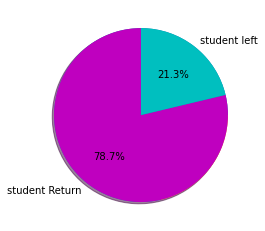

In [15]:
plt.pie(data["STDNT_LEFT"].value_counts())

#piechart
slices=data["STDNT_LEFT"].value_counts()
names=["student Return","student left"]
cols=["m","c"]

plt.pie(slices,labels=names,colors=cols,startangle=90,shadow=True,autopct="%1.1f%%")

plt.show()

In [14]:
print('Number of students attrited is '+ str(data[data['STDNT_LEFT']==1].shape[0]))
print('Number of students not attrited is '+ str(data[data['STDNT_LEFT']==0].shape[0]))
print('Percentage of attrition is '+ str((round(((len(data[data['STDNT_LEFT']==1])/data.shape[0])*100),2))) + '%')
print('Percentage of no attrition is '+ str((round(((len(data[data['STDNT_LEFT']==0])/data.shape[0])*100),2))) + '%')

Number of students attrited is 723
Number of students not attrited is 2677
Percentage of attrition is 21.26%
Percentage of no attrition is 78.74%


In [15]:
data['STDNT_AGE']=data['STDNT_AGE'].replace({16:'16to18',17:'16to18',18:'16to18'})
data['STDNT_AGE']=data['STDNT_AGE'].replace({19:'19to21',20:'19to21',21:'19to21'})
data['STDNT_AGE']=data['STDNT_AGE'].replace({22:'22to26',23:'22to26',24:'22to26',25:'22to26',26:'22to26'})
data.STDNT_AGE.unique()

array(['16to18', '19to21', '22to26'], dtype=object)

In [16]:
A1=data.groupby(['STDNT_AGE','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
A2=data.groupby('STDNT_AGE',as_index=False)['STUDENT IDENTIFIER'].agg('count')
AGE=pd.merge(A1,A2,how='outer',on='STDNT_AGE')
AGE=AGE.query("STDNT_LEFT==1")
AGE['Attrition Percentage']=round((AGE['STUDENT IDENTIFIER_x']/AGE['STUDENT IDENTIFIER_y'])*100,0)
AGE.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(AGE.index)): ind=ind+[i] 
AGE.index=ind
AGE.sort_values('Attrition Percentage')

,STDNT_AGE,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
2,22to26,1,2,12,17.0
0,16to18,1,660,3177,21.0
1,19to21,1,61,211,29.0


Text(0, 0.5, 'Attrition Percentage of student age')

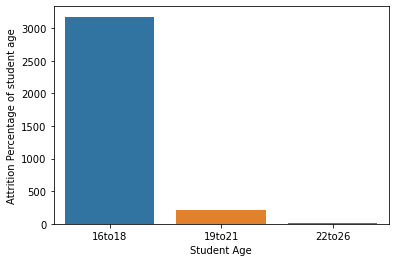

In [17]:
sns.countplot(x = 'STDNT_AGE', data = data)
plt.xlabel('Student Age')
plt.ylabel('Attrition Percentage of student age')

In [18]:
G1=data.groupby(['STDNT_GENDER','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
G2=data.groupby('STDNT_GENDER',as_index=False)['STUDENT IDENTIFIER'].agg('count')
G=pd.merge(G1,G2,how='outer',on='STDNT_GENDER')
G=G.query("STDNT_LEFT==1")
G['Attrition Percentage']=round((G['STUDENT IDENTIFIER_x']/G['STUDENT IDENTIFIER_y'])*100,0)
G.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(G.index)): ind=ind+[i] 
G.index=ind
G.sort_values('Attrition Percentage')

,STDNT_GENDER,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
1,M,1,248,1260,20.0
0,F,1,475,2140,22.0


Text(0, 0.5, 'Attrition Percentage of student genderwise')

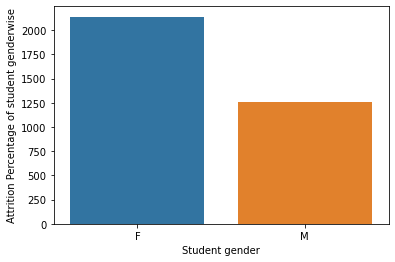

In [19]:
sns.countplot(x = 'STDNT_GENDER', data = data)
plt.xlabel('Student gender')
plt.ylabel('Attrition Percentage of student genderwise')

In [20]:
tab1=pd.crosstab([data.STDNT_AGE,data.STDNT_GENDER],data.STDNT_LEFT)
tab1=DataFrame(tab1)
tab1

STDNT_LEFT                 0    1
STDNT_AGE STDNT_GENDER           
16to18    F             1597  444
          M              920  216
19to21    F               66   30
          M               84   31
22to26    F                2    1
          M                8    1

In [21]:
BGD1=data.groupby(['STDNT_BACKGROUND','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
BGD2=data.groupby('STDNT_BACKGROUND',as_index=False)['STUDENT IDENTIFIER'].agg('count')
BGD=pd.merge(BGD1,BGD2,how='outer',on='STDNT_BACKGROUND')
BGD=BGD.query("STDNT_LEFT==1")
BGD['Attrition Percentage']=round((BGD['STUDENT IDENTIFIER_x']/BGD['STUDENT IDENTIFIER_y'])*100,0)
BGD.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(0,8): ind=ind+[i] 
BGD.index=ind
BGD.sort_values('Attrition Percentage')

,STDNT_BACKGROUND,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
5,BGD 6,1,14,94,15.0
2,BGD 3,1,170,947,18.0
3,BGD 4,1,26,139,19.0
7,BGD 8,1,1,5,20.0
0,BGD 1,1,477,2082,23.0
1,BGD 2,1,24,106,23.0
6,BGD 7,1,7,19,37.0
4,BGD 5,1,4,8,50.0


Text(0, 0.5, 'Attrition Percentage of student')

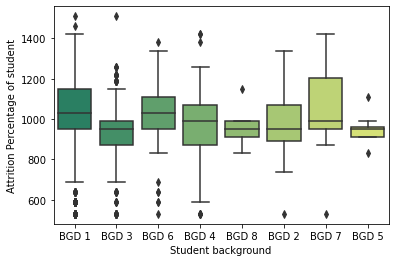

In [22]:
sns.boxplot(x=data["STDNT_BACKGROUND"],y='STDNT_TEST_ENTRANCE_COMB',data=data,palette='summer')
plt.xlabel('Student background')
plt.ylabel('Attrition Percentage of student')

In [23]:
INS1=data.groupby(['INTERNATIONAL_STS','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
INS2=data.groupby('INTERNATIONAL_STS',as_index=False)['STUDENT IDENTIFIER'].agg('count')
INS=pd.merge(INS1,INS2,how='outer',on='INTERNATIONAL_STS')
INS=INS.query("STDNT_LEFT==1")
INS['Attrition Percentage']=round((INS['STUDENT IDENTIFIER_x']/INS['STUDENT IDENTIFIER_y'])*100,0)
INS.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(INS.index)): ind=ind+[i] 
INS.index=ind
INS.sort_values('Attrition Percentage')

,INTERNATIONAL_STS,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
0,N,1,711,3373,21.0
1,Y,1,12,27,44.0


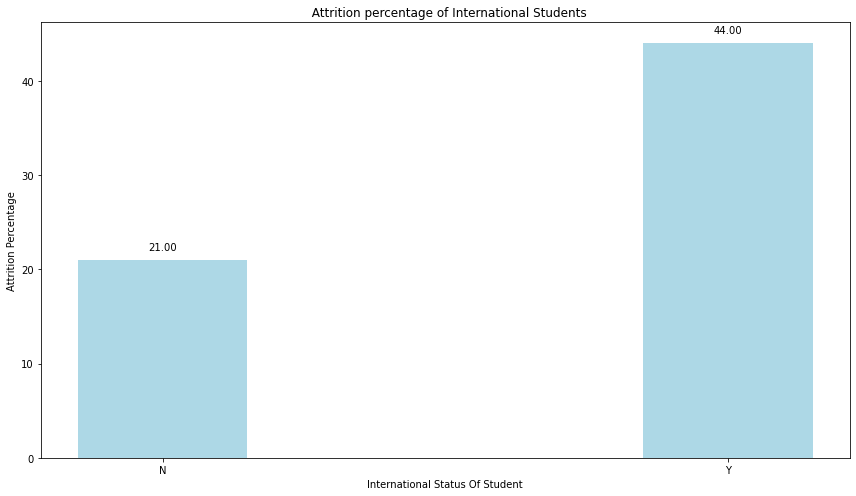

In [24]:
h, axs = plt.subplots(figsize=(12,7))
plt.bar(INS['INTERNATIONAL_STS'],INS['Attrition Percentage'],width=0.3,color='lightblue')
plt.title('  Attrition percentage of International Students')
plt.xlabel('International Status Of Student')
plt.ylabel('Attrition Percentage')

for x,y in zip(INS['INTERNATIONAL_STS'],INS['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
h.savefig(' Attrition of international students.jpeg')

In [25]:
HS1=data.groupby(['HOUSING_STS','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
HS2=data.groupby('HOUSING_STS',as_index=False)['STUDENT IDENTIFIER'].agg('count')
HS=pd.merge(HS1,HS2,how='outer',on='HOUSING_STS')
HS=HS.query("STDNT_LEFT==1")
HS['Attrition Percentage']=round((HS['STUDENT IDENTIFIER_x']/HS['STUDENT IDENTIFIER_y'])*100,0)
HS.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(HS.index)): ind=ind+[i] 
HS.index=ind
HS.sort_values('Attrition Percentage')

,HOUSING_STS,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
0,Off Campus,1,389,1981,20.0
1,On Campus,1,334,1419,24.0


Text(0, 0.5, 'Attrition Percentage')

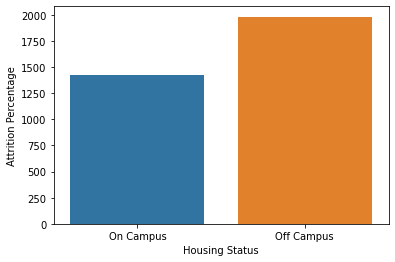

In [26]:
sns.countplot(x = 'HOUSING_STS', data = data)
plt.xlabel('Housing Status')
plt.ylabel('Attrition Percentage')

In [27]:
tab2=pd.crosstab([data.INTERNATIONAL_STS,data.IN_STATE_FLAG,data.HOUSING_STS],data.STDNT_LEFT)
tab2=DataFrame(tab2)
tab2

STDNT_LEFT                                      0    1
INTERNATIONAL_STS IN_STATE_FLAG HOUSING_STS           
N                 N             Off Campus    180   46
                                On Campus      53   31
                  Y             Off Campus   1406  338
                                On Campus    1023  296
Y                 N             Off Campus      6    5
                                On Campus       9    7

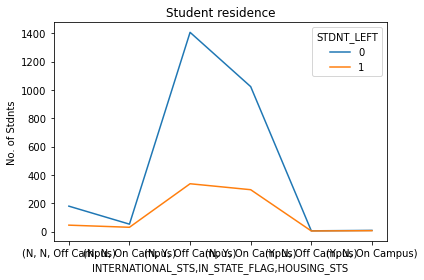

In [28]:
tab2.plot(kind='line')
plt.title('Student residence')
plt.ylabel('No. of Stdnts')
plt.tight_layout()

In [30]:
data['DISTANCE_FROM_HOME'].value_counts()

69.0      1402
0.0        671
150.0      497
90.0       248
138.0      227
          ... 
316.0        1
151.0        1
403.0        1
572.0        1
1078.0       1
Name: DISTANCE_FROM_HOME, Length: 71, dtype: int64

In [31]:
data.DISTANCE_FROM_HOME.quantile(0.90)

150.0

In [32]:
data=data.drop('DISTANCE_FROM_HOME',axis=1)

In [33]:
data['STDNT_MAJOR'].value_counts().sort_values(ascending=False).index

Index(['Undeclared', 'Biology', 'Early Childhood Education', 'Pre-Nursing',
       'Nursing', 'Psychology', 'Pre-Business', 'Theatre Arts',
       'Music Performance', 'Criminal Justice', 'Music Education',
       'General Business', 'Exercise Science', 'Art', 'Management',
       'Communication', 'Political Science', 'Chemistry',
       'Engineering Studies', 'English Language/Literature', 'Marketing',
       'Computer Science - Systems', 'Accounting', 'Health Science',
       'Computer Science - Games', 'Joint Enrollment - Accel', 'History',
       'Applied Computer Science', 'Theatre Education',
       'English and Secondary Ed', 'Pre-Engineering/RETP',
       'History and Secondary Ed', 'Mathematics', 'Finance',
       'Management Information Systems', 'Health and Physical Education',
       'Sociology', 'Middle Grades Education', 'Music',
       'Spec Ed: Gen. Curr. - Reading', 'General Studies/AS',
       'Mathematics and Secondary Ed', 'Information Technology',
       'Art Educa

In [34]:
list=['General Business', 'Exercise Science', 'Art', 'Management',
        'Communication', 'Chemistry', 'Political Science',
        'Engineering Studies', 'English Language/Literature', 'Marketing',
        'Computer Science - Systems', 'Accounting', 'Health Science',
        'Computer Science - Games', 'Joint Enrollment - Accel', 'History',
        'Applied Computer Science', 'Theatre Education',
        'English and Secondary Ed', 'History and Secondary Ed',
        'Pre-Engineering/RETP', 'Mathematics', 'Finance',
        'Management Information Systems', 'Sociology',
        'Health and Physical Education', 'Middle Grades Education', 'Music',
        'Spec Ed: Gen. Curr. - Reading', 'General Studies/AS',
        'Mathematics and Secondary Ed', 'Information Technology',
        'Art Education', 'Spanish', 'Biology and Secondary Ed',
        'French with Teacher Cert', 'Geology', 'Spanish with Teacher Cert',
        'French', 'Early Admission - Accel', 'Earth and Space Science',
        'Chemistry and Secondary Ed', 'Liberal Arts','Undeclared']
data['STDNT_MAJOR'].replace(list,'Others',inplace=True)

In [35]:
data['STDNT_MAJOR'].unique()

array(['Others', 'Biology', 'Criminal Justice', 'Psychology',
       'Theatre Arts', 'Nursing', 'Pre-Nursing',
       'Early Childhood Education', 'Music Performance', 'Pre-Business',
       'Music Education'], dtype=object)

In [36]:
MJR1=data.groupby(['STDNT_MAJOR','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
MJR2=data.groupby('STDNT_MAJOR',as_index=False)['STUDENT IDENTIFIER'].agg('count')
MJR=pd.merge(MJR1,MJR2,how='outer',on='STDNT_MAJOR')
MJR=MJR.query("STDNT_LEFT==1")
MJR['Attrition Percentage']=round((MJR['STUDENT IDENTIFIER_x']/MJR['STUDENT IDENTIFIER_y'])*100,0)
MJR.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(MJR.index)): ind=ind+[i] 
MJR.index=ind
MJR.sort_values('Attrition Percentage')

,STDNT_MAJOR,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
3,Music Education,1,8,96,8.0
10,Theatre Arts,1,12,131,9.0
4,Music Performance,1,12,99,12.0
2,Early Childhood Education,1,37,190,19.0
6,Others,1,384,1795,21.0
0,Biology,1,82,362,23.0
5,Nursing,1,37,164,23.0
7,Pre-Business,1,32,133,24.0
8,Pre-Nursing,1,47,177,27.0
9,Psychology,1,43,155,28.0


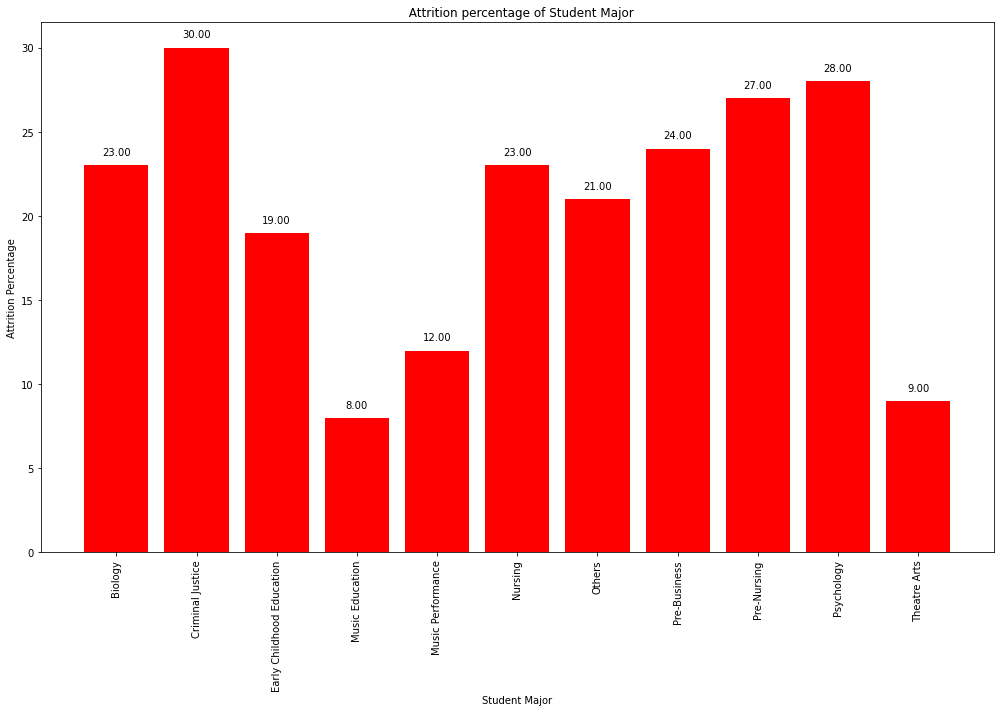

In [37]:
h, axs = plt.subplots(figsize=(14,10))



plt.bar(MJR['STDNT_MAJOR'],MJR['Attrition Percentage'],color='red')
plt.title('  Attrition percentage of Student Major')
plt.xlabel('Student Major')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=90)

for x,y in zip(MJR['STDNT_MAJOR'],MJR['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')


plt.tight_layout()
plt.show()
h.savefig(' Attrition ofstudent major.jpeg')

In [38]:
data['STDNT_MINOR'].value_counts().sort_values(ascending=False)

N                                3160
Spanish                            26
Music                              19
Psychology                         19
Foundations of Business            15
Communication                      14
History                            13
Criminal Justice                   12
Theatre Arts                       12
Computer Science - Systems         10
Early Childhood Education           9
Mathematics                         7
Professional Writing                6
Marketing                           6
Art History                         6
English Language/Literature         5
Art                                 5
Sociology                           5
Biology                             4
Chemistry                           4
Political Science                   4
Accounting                          4
French                              4
Health Science                      3
International Business              3
Computer Info. Management           3
Economics   

In [39]:
data=data.drop('STDNT_MINOR',axis=1)

In [40]:
data['STDNT_TEST_ENTRANCE_COMB'].isnull().sum()

518

In [41]:
data['STDNT_TEST_ENTRANCE_COMB'].describe()

count    2882.000000
mean      997.758501
std       156.268221
min       530.000000
25%       910.000000
50%       990.000000
75%      1110.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [42]:
data['STDNT_TEST_ENTRANCE_COMB']=data['STDNT_TEST_ENTRANCE_COMB'].fillna(990.0)

In [43]:
data['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3400.000000
mean      996.576471
std       143.895853
min       530.000000
25%       910.000000
50%       990.000000
75%      1070.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [44]:
data['STDNT_TEST_ENTRANCE_COMB'].unique()

array([1150., 1190., 1030., 1220., 1070.,  590.,  740.,  990., 1260.,
       1110.,  910., 1300.,  640.,  530., 1340., 1380.,  950.,  690.,
        870.,  790., 1420.,  830., 1510., 1460.])

In [45]:
ETC1=data.groupby(['STDNT_TEST_ENTRANCE_COMB','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
ETC2=data.groupby('STDNT_TEST_ENTRANCE_COMB',as_index=False)['STUDENT IDENTIFIER'].agg('count')
ETC=pd.merge(ETC1,ETC2,how='outer',on='STDNT_TEST_ENTRANCE_COMB')
ETC=ETC.query("STDNT_LEFT==1")
ETC['Attrition Percentage']=round((ETC['STUDENT IDENTIFIER_x']/ETC['STUDENT IDENTIFIER_y'])*100,0)
ETC.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(ETC.index)): ind=ind+[i] 
ETC.index=ind
ETC.sort_values('Attrition Percentage')

,STDNT_TEST_ENTRANCE_COMB,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
4,740.0,1,2,25,8.0
5,790.0,1,5,48,10.0
1,590.0,1,6,48,12.0
19,1340.0,1,3,22,14.0
17,1260.0,1,10,68,15.0
2,640.0,1,4,23,17.0
18,1300.0,1,6,35,17.0
16,1220.0,1,18,107,17.0
0,530.0,1,9,51,18.0
12,1070.0,1,46,234,20.0


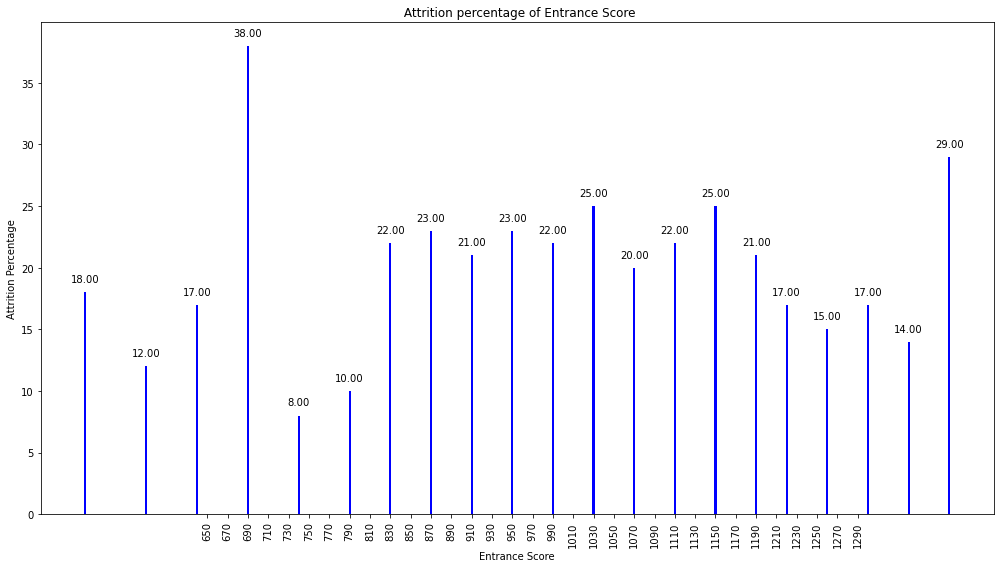

In [46]:

f, axs = plt.subplots(figsize=(14,8))


plt.bar(ETC['STDNT_TEST_ENTRANCE_COMB'],ETC['Attrition Percentage'],width=2,color='blue')
plt.title(' Attrition percentage of Entrance Score')
plt.xlabel('Entrance Score')
plt.ylabel('Attrition Percentage')
plt.xticks(range(650,1310,20),rotation=90)

for x,y in zip(ETC['STDNT_TEST_ENTRANCE_COMB'],ETC['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig(' Attrition of enterance score.jpeg')

Text(0, 0.5, 'No. of Stdnts')

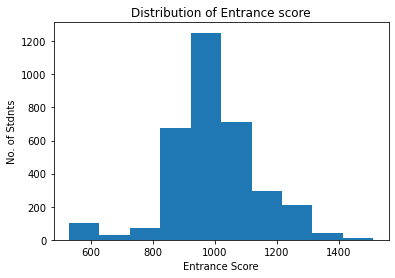

In [47]:
data.STDNT_TEST_ENTRANCE_COMB.plot(kind = 'hist')
plt.title('Distribution of Entrance score')
plt.xlabel('Entrance Score')
plt.ylabel('No. of Stdnts')

In [48]:
data=data.drop(['FIRST_TERM', 'CORE_COURSE_NAME_1_F',
       'CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'SECOND_TERM', 'CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S'],axis=1)

In [49]:
data.HIGH_SCHL_GPA.describe()

count    3347.000000
mean        3.202738
std         0.455337
min         0.000000
25%         2.870000
50%         3.200000
75%         3.560000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [50]:
data.HIGH_SCHL_GPA=data.HIGH_SCHL_GPA.fillna(3.2)

Text(0, 0.5, 'No. of Stdnts')

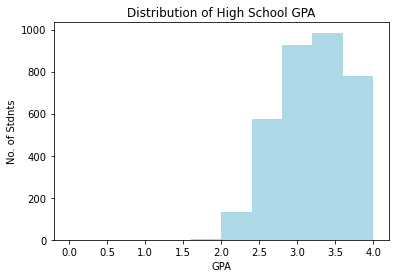

In [51]:
plt.hist(data.HIGH_SCHL_GPA,color='lightblue')
plt.title('Distribution of High School GPA')
plt.xlabel('GPA')
plt.ylabel('No. of Stdnts')

In [52]:
data=data.drop(['HIGH_SCHL_NAME', 'FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','DEGREE_GROUP_CD'],axis=1)

In [53]:
print(sorted(data.FIRST_TERM_ATTEMPT_HRS.unique()))
print(sorted(data.FIRST_TERM_EARNED_HRS.unique()))

data['FIRST_TERM_PERFORMANCE']=data.FIRST_TERM_EARNED_HRS/data.FIRST_TERM_ATTEMPT_HRS

print(sorted(data.FIRST_TERM_PERFORMANCE.unique()))

[9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0.0, 0.06666666666666667, 0.07142857142857142, 0.07692307692307693, 0.08333333333333333, 0.13333333333333333, 0.14285714285714285, 0.16666666666666666, 0.17647058823529413, 0.1875, 0.2, 0.21428571428571427, 0.23076923076923078, 0.25, 0.26666666666666666, 0.2857142857142857, 0.3076923076923077, 0.3333333333333333, 0.35294117647058826, 0.35714285714285715, 0.375, 0.38461538461538464, 0.3888888888888889, 0.4, 0.4117647058823529, 0.4166666666666667, 0.42857142857142855, 0.4375, 0.4444444444444444, 0.46153846153846156, 0.4666666666666667, 0.5, 0.5294117647058824, 0.5333333333333333, 0.5384615384615384, 0.5625, 0.5714285714285714, 0.5833333333333334, 0.5882352941176471, 0.6, 0.6111111111111112, 0.6153846153846154, 0.625, 0.6428571428571429, 0.6666666666666666, 0.6875, 0.6923076923076923, 0.7058823529411765, 0.7142857142857143, 0.7222222222222222, 0.7333333333333333,

In [54]:
print(data.query("FIRST_TERM_PERFORMANCE==1.2307692307692308").index)
print(data.query("FIRST_TERM_PERFORMANCE==1.2727272727272727").index)
print(data.query("FIRST_TERM_PERFORMANCE==1.3333333333333333").index)

Int64Index([906, 2262], dtype='int64')
Int64Index([3342], dtype='int64')
Int64Index([998], dtype='int64')


In [55]:
data=data.drop([998,3342,906,2262],axis=0)

In [56]:
print(sorted(data.SECOND_TERM_ATTEMPT_HRS.unique()))
print(sorted(data.SECOND_TERM_EARNED_HRS.unique()))

data['SECOND_TERM_PERFORMANCE']=data.SECOND_TERM_EARNED_HRS/data.SECOND_TERM_ATTEMPT_HRS

print(sorted(data.SECOND_TERM_PERFORMANCE.unique()))

[2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, nan]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, nan]
[0.23076923076923078, 0.35714285714285715, 0.46153846153846156, 0.47368421052631576, 0.5, 0.5294117647058824, 0.5333333333333333, 0.5384615384615384, 0.5555555555555556, 0.5625, 0.5882352941176471, 0.6, 0.631578947368421, 0.6470588235294118, 0.6666666666666666, 0.6875, 0.6923076923076923, 0.7, 0.7058823529411765, 0.7142857142857143, 0.7222222222222222, 0.7333333333333333, 0.75, 0.7647058823529411, 0.7692307692307693, 0.7777777777777778, 0.7857142857142857, 0.7894736842105263, 0.8, 0.8125, 0.8181818181818182, 0.8235294117647058, 0.8333333333333334, 0.8571428571428571, 0.8666666666666667, 0.8823529411764706, 0.8947368421052632, 0.9230769230769231, 0.9285714285714286, 0.9333333333333333, 0.9375, 0.9411764705882353, 0.9444444444444444,

In [57]:
print(data.SECOND_TERM_PERFORMANCE.isnull().sum())
data.SECOND_TERM_PERFORMANCE=data.SECOND_TERM_PERFORMANCE.fillna(data.SECOND_TERM_PERFORMANCE.mean())

208


In [58]:
data=data.drop(['FIRST_TERM_ATTEMPT_HRS', 'FIRST_TERM_EARNED_HRS',
       'SECOND_TERM_ATTEMPT_HRS', 'SECOND_TERM_EARNED_HRS'],axis=1)

In [59]:
data.columns

Index(['STUDENT IDENTIFIER', 'STDNT_AGE', 'STDNT_GENDER', 'STDNT_BACKGROUND',
       'IN_STATE_FLAG', 'INTERNATIONAL_STS', 'STDNT_MAJOR',
       'STDNT_TEST_ENTRANCE_COMB', 'HOUSING_STS', 'HIGH_SCHL_GPA',
       'FATHER_HI_EDU_DESC', 'MOTHER_HI_EDU_DESC', 'DEGREE_GROUP_DESC',
       'GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION',
       'UNMET_NEED', 'STDNT_LEFT', 'FIRST_TERM_PERFORMANCE',
       'SECOND_TERM_PERFORMANCE'],
      dtype='object')

In [60]:
FED1=data.groupby(['FATHER_HI_EDU_DESC','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
FED2=data.groupby('FATHER_HI_EDU_DESC',as_index=False)['STUDENT IDENTIFIER'].agg('count')
FED=pd.merge(FED1,FED2,how='outer',on='FATHER_HI_EDU_DESC')
FED=FED.query("STDNT_LEFT==1")
FED['Attrition Percentage']=round((FED['STUDENT IDENTIFIER_x']/FED['STUDENT IDENTIFIER_y'])*100,0)
FED.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(FED.index)): ind=ind+[i] 
FED.index=ind
FED.sort_values('Attrition Percentage')

,FATHER_HI_EDU_DESC,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
0,College/Beyond,1,256,1307,20.0
4,Other/Unknown,1,48,226,21.0
1,High School,1,288,1334,22.0
3,No Information,1,103,432,24.0
2,Middle School/Junior High,1,26,97,27.0


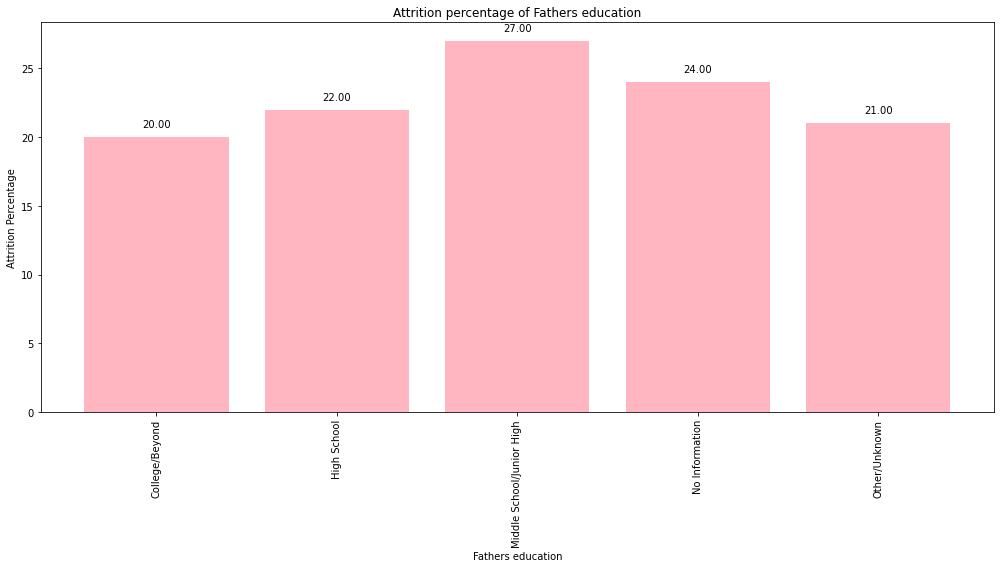

In [61]:
f, axs = plt.subplots(figsize=(14,8))


plt.bar(FED['FATHER_HI_EDU_DESC'],FED['Attrition Percentage'],width=0.8,color='lightpink')
plt.title('Attrition percentage of Fathers education')
plt.xlabel('Fathers education')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=90)

for x,y in zip(FED['FATHER_HI_EDU_DESC'],FED['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
f.savefig(' Attrition of father education.jpeg')

In [62]:
MED1=data.groupby(['MOTHER_HI_EDU_DESC','STDNT_LEFT'],as_index=False)['STUDENT IDENTIFIER'].agg('count')
MED2=data.groupby('MOTHER_HI_EDU_DESC',as_index=False)['STUDENT IDENTIFIER'].agg('count')
MED=pd.merge(MED1,MED2,how='outer',on='MOTHER_HI_EDU_DESC')
MED=MED.query("STDNT_LEFT==1")
MED['Attrition Percentage']=round((MED['STUDENT IDENTIFIER_x']/MED['STUDENT IDENTIFIER_y'])*100,0)
MED.rename(columns={"STUDENT IDENTIFIER_x":"No of attrition","STUDENT IDENTIFIER_y":"Total no. of students"},inplace=True)
ind=[]
for i in range(len(FED.index)): ind=ind+[i] 
MED.index=ind
MED.sort_values('Attrition Percentage')

,MOTHER_HI_EDU_DESC,STDNT_LEFT,No of attrition,Total no. of students,Attrition Percentage
4,Other/Unknown,1,18,117,15.0
0,College/Beyond,1,299,1496,20.0
1,High School,1,265,1223,22.0
2,Middle School/Junior High,1,16,71,23.0
3,No Information,1,123,489,25.0


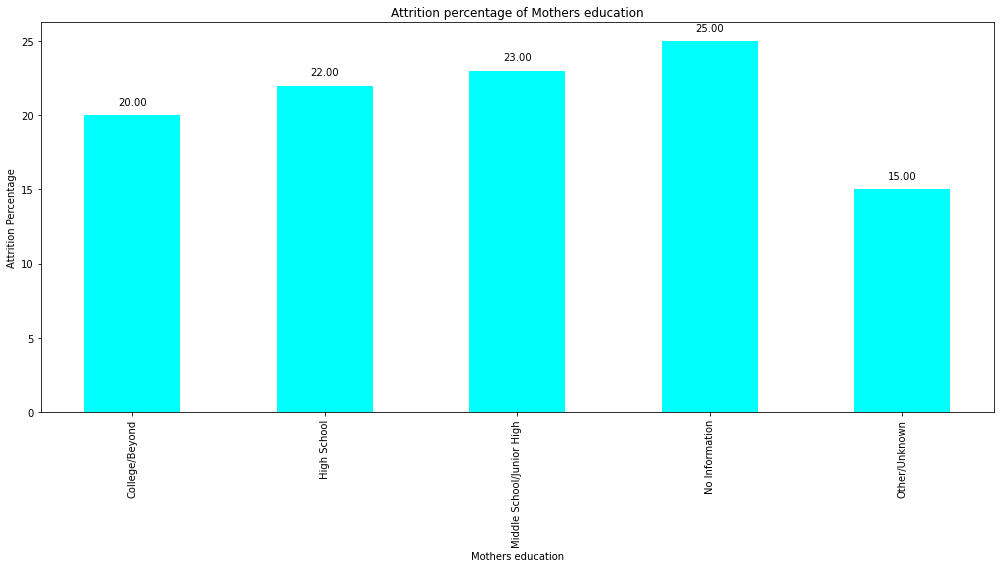

In [63]:
h, axs = plt.subplots(figsize=(14,8))



plt.bar(MED['MOTHER_HI_EDU_DESC'],MED['Attrition Percentage'],width=0.5,color='cyan')
plt.title('Attrition percentage of Mothers education')
plt.xlabel('Mothers education')
plt.ylabel('Attrition Percentage')
plt.xticks(rotation=90)

for x,y in zip(MED['MOTHER_HI_EDU_DESC'],MED['Attrition Percentage']):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

plt.tight_layout()
plt.show()
h.savefig(' Attrition of mother education.jpeg')

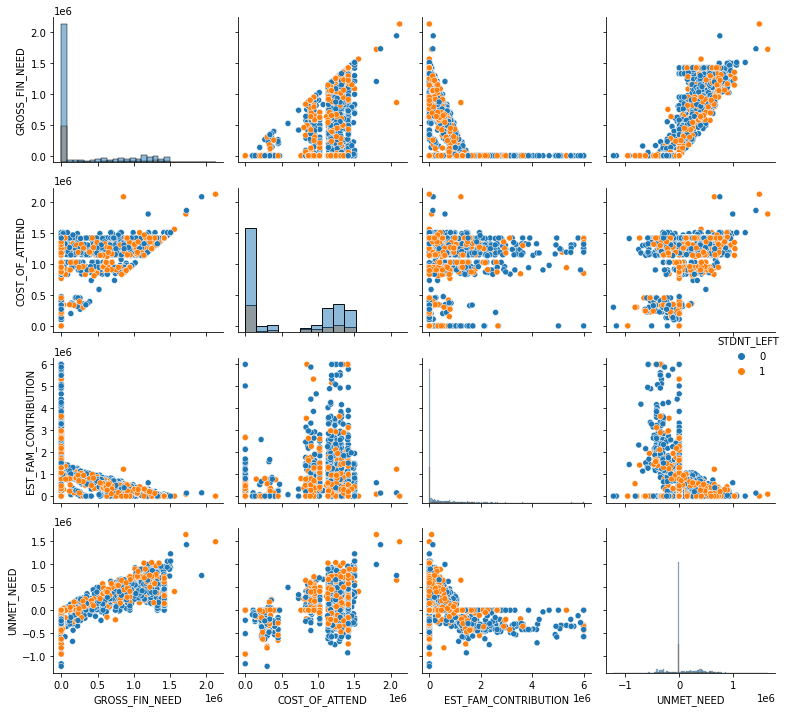

In [64]:
sns.pairplot(data,x_vars=['GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION','UNMET_NEED'],
             y_vars=['GROSS_FIN_NEED', 'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION','UNMET_NEED'],kind='scatter',diag_kind='hist',
             hue='STDNT_LEFT')
plt.tight_layout()
plt.savefig('Financial statement - Pairplot.jpeg')

In [65]:
data=data.drop('GROSS_FIN_NEED',axis=1)

In [66]:
data=pd.get_dummies(data)

In [67]:
data.head()

,STUDENT IDENTIFIER,STDNT_TEST_ENTRANCE_COMB,HIGH_SCHL_GPA,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,STDNT_LEFT,FIRST_TERM_PERFORMANCE,SECOND_TERM_PERFORMANCE,STDNT_AGE_16to18,...,FATHER_HI_EDU_DESC_No Information,FATHER_HI_EDU_DESC_Other/Unknown,MOTHER_HI_EDU_DESC_College/Beyond,MOTHER_HI_EDU_DESC_High School,MOTHER_HI_EDU_DESC_Middle School/Junior High,MOTHER_HI_EDU_DESC_No Information,MOTHER_HI_EDU_DESC_Other/Unknown,DEGREE_GROUP_DESC_Associate,DEGREE_GROUP_DESC_Bachelors,DEGREE_GROUP_DESC_Career Associate
0,7808615,1150.0,4.00,0,0,0.0,1,1.0,1.0,1,...,1,0,0,0,0,1,0,0,1,0
1,7830063,1190.0,2.89,1355760,785760,459300.0,0,1.0,1.0,0,...,0,0,1,0,0,0,0,0,1,0
2,7847538,1030.0,3.39,0,0,0.0,0,1.0,1.0,1,...,0,0,0,0,0,0,1,0,1,0
3,8006429,1220.0,2.93,0,0,0.0,0,1.0,1.0,1,...,0,0,1,0,0,0,0,0,1,0
4,7962680,1190.0,3.86,1355760,519840,278340.0,0,1.0,1.0,1,...,0,0,0,1,0,0,0,0,1,0


In [68]:
X=data.drop(['STUDENT IDENTIFIER','STDNT_LEFT'],axis=1)

In [69]:
y=data['STDNT_LEFT']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=80,random_state=123)
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=80, random_state=123)

In [72]:
clf.score(X_test,y_test)

0.8382352941176471

In [73]:
for w in range(10,300,20):
    clf=GradientBoostingClassifier(n_estimators=w,random_state=123)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    print('For n_estimators = '+str(w))
    print('score is '+str(score))
    print('__________________')

For n_estimators = 10
score is 0.8308823529411765
__________________
For n_estimators = 30
score is 0.836764705882353
__________________
For n_estimators = 50
score is 0.8382352941176471
__________________
For n_estimators = 70
score is 0.8382352941176471
__________________
For n_estimators = 90
score is 0.8382352941176471
__________________
For n_estimators = 110
score is 0.8411764705882353
__________________
For n_estimators = 130
score is 0.8397058823529412
__________________
For n_estimators = 150
score is 0.8352941176470589
__________________
For n_estimators = 170
score is 0.8382352941176471
__________________
For n_estimators = 190
score is 0.836764705882353
__________________
For n_estimators = 210
score is 0.8352941176470589
__________________
For n_estimators = 230
score is 0.8352941176470589
__________________
For n_estimators = 250
score is 0.8338235294117647
__________________
For n_estimators = 270
score is 0.8323529411764706
__________________
For n_estimators = 290
scor

In [74]:
clf=GradientBoostingClassifier(n_estimators=210,random_state=123)
clf.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=210, random_state=123)

In [75]:
clf.score(X_test,y_test)

0.8352941176470589

In [76]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print('The AUC for the model :',str(metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))
print('\n')
print('Confusion matrix :','\n',str(metrics.confusion_matrix(y_test,y_pred)))

The AUC for the model : 0.6899603174603175


Confusion matrix : 
 [[524  16]
 [ 96  44]]


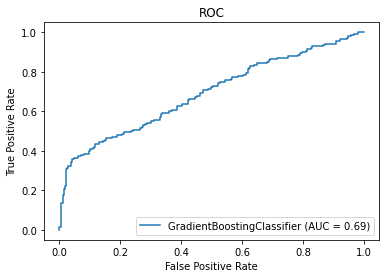

In [77]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(clf, X_test, y_test)
plt.title('ROC')
plt.savefig('ROC.jpeg')
plt.show()

In [78]:
imp=clf.feature_importances_

In [79]:
feature_importance=pd.Series(imp,index=X.columns.tolist()).sort_values(ascending=False)
feature_importance

SECOND_TERM_PERFORMANCE                         0.483603
UNMET_NEED                                      0.106069
HIGH_SCHL_GPA                                   0.074393
EST_FAM_CONTRIBUTION                            0.053896
COST_OF_ATTEND                                  0.039001
STDNT_TEST_ENTRANCE_COMB                        0.037163
FIRST_TERM_PERFORMANCE                          0.034683
HOUSING_STS_Off Campus                          0.012249
STDNT_MAJOR_Music Performance                   0.009926
STDNT_BACKGROUND_BGD 1                          0.009205
STDNT_MAJOR_Theatre Arts                        0.008487
STDNT_MAJOR_Criminal Justice                    0.007899
MOTHER_HI_EDU_DESC_No Information               0.006800
STDNT_BACKGROUND_BGD 3                          0.006799
STDNT_MAJOR_Music Education                     0.006488
STDNT_BACKGROUND_BGD 4                          0.006432
STDNT_MAJOR_Pre-Nursing                         0.006413
STDNT_MAJOR_Psychology         

<AxesSubplot:>

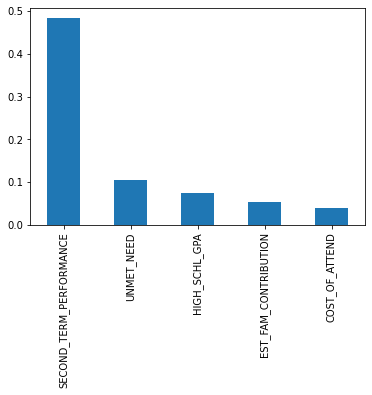

In [80]:
feature_importance.head().plot(kind='bar')